In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

html = urlopen('https://www.basketball-reference.com/leagues/NBA_2024_totals.html')
bs = BeautifulSoup(html.read(), 'html.parser')
print(bs)


<!DOCTYPE html>

<html class="no-js" data-root="/home/bbr/build" data-version="klecko-" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport">
<link href="https://cdn.ssref.net/req/202404081" rel="dns-prefetch"/>
<!-- InMobi Choice. Consent Manager Tag v3.0 (for TCF 2.2) -->
<script async="true" type="text/javascript">
(function() {
  var host = window.location.hostname;
  var element = document.createElement('script');
  var firstScript = document.getElementsByTagName('script')[0];
  var url = 'https://cmp.inmobi.com'
    .concat('/choice/', 'XwNYEpNeFfhfr', '/', host, '/choice.js?tag_version=V3');
  var uspTries = 0;
  var uspTriesLimit = 3;
  element.async = true;
  element.type = 'text/javascript';
  element.src = url;

  firstScript.parentNode.insertBefore(element, firstScript);

  function makeStub() {
    var TCF_LOCATOR_NAME = '__tcfapiLocator';
 

In [ ]:
# Find the table with the specified class
table = bs.find('table', class_='sortable stats_table')

# Check if the table is found
if table:
    rows = table.find_all('tr')
    header_columns = [th.text.strip() for th in rows[0].find_all('th')]

    # Extract the data from the remaining rows
    data = []
    for row in rows[1:]:
        if len(row.find_all(['td', 'th'])) == len(header_columns):
            row_data = [td.text.strip() for td in row.find_all(['td', 'th'])]
            data.append(row_data)

    # Convert header_columns and data to DataFrame
    df = pd.DataFrame(data, columns=header_columns)

    # Print the DataFrame
    print("DataFrame:")
    print(df)
else:
    print("Table not found.")


DataFrame:
      Rk            Player   Pos Age   Tm   G  GS    MP   FG   FGA  ...   FT%  \
0      1  Precious Achiuwa  PF-C  24  TOT  74  18  1624  235   469  ...  .616   
1      1  Precious Achiuwa     C  24  TOR  25   0   437   78   170  ...  .571   
2      1  Precious Achiuwa    PF  24  NYK  49  18  1187  157   299  ...  .643   
3      2       Bam Adebayo     C  26  MIA  71  71  2416  530  1017  ...  .755   
4      3      Ochai Agbaji    SG  23  TOT  78  28  1641  178   433  ...  .661   
..   ...               ...   ...  ..  ...  ..  ..   ...  ...   ...  ...   ...   
758  568    Thaddeus Young    PF  35  PHO  10   0    89   11    21  ...  .333   
759  569        Trae Young    PG  25  ATL  54  54  1942  433  1008  ...  .855   
760  570    Omer Yurtseven     C  25  UTA  48  12   545   99   184  ...  .679   
761  571       Cody Zeller     C  31  NOP  43   0   320   26    62  ...  .605   
762  572       Ivica Zubac     C  26  LAC  68  68  1794  337   519  ...  .723   

     ORB  DRB  T

In [ ]:
print(df.columns)

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


In [ ]:
selected_columns = ["Player", "G", "PTS","TRB", "AST", "STL","TOV"]
df_filtered = df[selected_columns]
print(df_filtered)


               Player   G   PTS  TRB  AST STL  TOV
0    Precious Achiuwa  74   565  487   97  46   83
1    Precious Achiuwa  25   193  136   44  16   29
2    Precious Achiuwa  49   372  351   53  30   54
3         Bam Adebayo  71  1367  737  278  81  162
4        Ochai Agbaji  78   455  216   83  47   64
..                ...  ..   ...  ...  ...  ..  ...
758    Thaddeus Young  10    23   28    7   5    4
759        Trae Young  54  1389  149  583  72  235
760    Omer Yurtseven  48   222  208   29   8   37
761       Cody Zeller  43    76  112   39   9   16
762       Ivica Zubac  68   794  626   93  22   79

[763 rows x 7 columns]


In [ ]:
column_names_to_sum = ['G', 'PTS', 'TRB', 'AST', 'STL', 'TOV']

# Convert the selected columns to numeric values
df_filtered_numeric = df_filtered[column_names_to_sum].apply(pd.to_numeric, errors='coerce')

# Add the 'Player' column back to the DataFrame
df_filtered_numeric['Player'] = df_filtered['Player']

# Drop duplicate rows based on 'Player' column
df_filtered_numeric = df_filtered_numeric.drop_duplicates(subset=['Player'])

# Ensure 'Player' column is of string type
df_filtered_numeric['Player'] = df_filtered_numeric['Player'].astype(str)

# Group by 'Player' and sum the statistics for each player
player_stats_sum = df_filtered_numeric.groupby('Player', as_index=False).sum()

# Print the summed statistics for each player
print(player_stats_sum)


              Player     G     PTS    TRB    AST   STL    TOV
0         A.J. Green  56.0   252.0   64.0   30.0   9.0   12.0
1        A.J. Lawson  42.0   136.0   50.0   20.0  10.0   14.0
2         AJ Griffin  20.0    48.0   18.0    5.0   1.0    8.0
3       Aaron Gordon  73.0  1013.0  471.0  259.0  56.0  105.0
4      Aaron Holiday  78.0   514.0  123.0  140.0  42.0   53.0
..               ...   ...     ...    ...    ...   ...    ...
568      Zach LaVine  25.0   487.0  129.0   98.0  21.0   52.0
569   Zavier Simpson   7.0    42.0   20.0   25.0   7.0   10.0
570       Zeke Nnaji  58.0   186.0  126.0   32.0  15.0   27.0
571  Ziaire Williams  51.0   420.0  180.0   75.0  36.0   66.0
572  Zion Williamson  70.0  1601.0  406.0  352.0  77.0  193.0

[573 rows x 7 columns]


In [ ]:
column_names_to_divide = ['PTS', 'TRB', 'AST', 'STL', 'TOV', 'G']

# Convert the selected columns to numeric values
player_stats_sum[column_names_to_divide] = player_stats_sum[column_names_to_divide].apply(pd.to_numeric, errors='coerce')

# Create new columns by dividing each Games column
player_stats_sum['Points per Game'] = player_stats_sum['PTS'] / player_stats_sum['G']
player_stats_sum['Rebounds per Game'] = player_stats_sum['TRB'] / player_stats_sum['G']
player_stats_sum['Assists per Game'] = player_stats_sum['AST'] / player_stats_sum['G']
player_stats_sum['Steals per Game'] = player_stats_sum['STL'] / player_stats_sum['G']
player_stats_sum['Turnovers per Game'] = player_stats_sum['TOV'] / player_stats_sum['G']

# Drop the original columns
player_stats_sum = player_stats_sum.drop(['PTS', 'TRB', 'AST', 'STL', 'TOV'], axis=1)

# Print the updated DataFrame
print(player_stats_sum)

              Player     G  Points per Game  Rebounds per Game  \
0         A.J. Green  56.0         4.500000           1.142857   
1        A.J. Lawson  42.0         3.238095           1.190476   
2         AJ Griffin  20.0         2.400000           0.900000   
3       Aaron Gordon  73.0        13.876712           6.452055   
4      Aaron Holiday  78.0         6.589744           1.576923   
..               ...   ...              ...                ...   
568      Zach LaVine  25.0        19.480000           5.160000   
569   Zavier Simpson   7.0         6.000000           2.857143   
570       Zeke Nnaji  58.0         3.206897           2.172414   
571  Ziaire Williams  51.0         8.235294           3.529412   
572  Zion Williamson  70.0        22.871429           5.800000   

     Assists per Game  Steals per Game  Turnovers per Game  
0            0.535714         0.160714            0.214286  
1            0.476190         0.238095            0.333333  
2            0.250000   

In [ ]:
# Create new columns for each average
player_stats_sum['Average Points per Game'] = player_stats_sum['Points per Game'].mean()
player_stats_sum['Average Rebounds per Game'] = player_stats_sum['Rebounds per Game'].mean()
player_stats_sum['Average Assists per Game'] = player_stats_sum['Assists per Game'].mean()
player_stats_sum['Average Steals per Game'] = player_stats_sum['Steals per Game'].mean()
player_stats_sum['Average Turnovers per Game'] = player_stats_sum['Turnovers per Game'].mean()

# Print the updated DataFrame
print(player_stats_sum)


              Player     G  Points per Game  Rebounds per Game  \
0         A.J. Green  56.0         4.500000           1.142857   
1        A.J. Lawson  42.0         3.238095           1.190476   
2         AJ Griffin  20.0         2.400000           0.900000   
3       Aaron Gordon  73.0        13.876712           6.452055   
4      Aaron Holiday  78.0         6.589744           1.576923   
..               ...   ...              ...                ...   
568      Zach LaVine  25.0        19.480000           5.160000   
569   Zavier Simpson   7.0         6.000000           2.857143   
570       Zeke Nnaji  58.0         3.206897           2.172414   
571  Ziaire Williams  51.0         8.235294           3.529412   
572  Zion Williamson  70.0        22.871429           5.800000   

     Assists per Game  Steals per Game  Turnovers per Game  \
0            0.535714         0.160714            0.214286   
1            0.476190         0.238095            0.333333   
2            0.250000

In [ ]:
print(player_stats_sum.columns)

Index(['Player', 'G', 'Points per Game', 'Rebounds per Game',
       'Assists per Game', 'Steals per Game', 'Turnovers per Game',
       'Average Points per Game', 'Average Rebounds per Game',
       'Average Assists per Game', 'Average Steals per Game',
       'Average Turnovers per Game'],
      dtype='object')


In [ ]:
# Define the list of rookies

rookies = [
    "Victor Wembanyama",
    "Brandon Miller",
    "Scoot Henderson",
    "Amen Thompson",
    "Ausar Thompson",
    "Anthony Black",
    "Bilal Coulibaly",
    "Jarace Walker",
    "Taylor Hendricks",
    "Cason Wallace",
    "Jett Howard",
    "Dereck Lively II",
    "Gradey Dick",
    "Jordan Hawkins",
    "Kobe Bufkin",
    "Keyonte George",
    "Jalen Hood-Schifino",
    "Jaime Jaquez Jr.",
    "Brandin Podziemski",
    "Cam Whitmore",
    "Noah Clowney",
    "Dariq Whitehead",
    "Kris Murray",
    "Olivier-Maxence Prosper",
    "Marcus Sasser",
    "Ben Sheppard",
    "Nick Smith Jr.",
    "Brice Sensabaugh",
    "Julian Strawther",
    "Kobe Brown"
]

# Filter the DataFrame to only include the players in the rookies list
rookies_df = player_stats_sum[player_stats_sum['Player'].isin(rookies)]
print(rookies_df)

                      Player     G  Points per Game  Rebounds per Game  \
19             Amen Thompson  62.0         9.548387           6.596774   
27             Anthony Black  69.0         4.579710           2.014493   
33            Ausar Thompson  63.0         8.825397           6.380952   
37              Ben Sheppard  57.0         4.421053           1.561404   
40           Bilal Coulibaly  63.0         8.444444           4.063492   
50        Brandin Podziemski  74.0         9.216216           5.770270   
54            Brandon Miller  74.0        17.283784           4.256757   
57          Brice Sensabaugh  32.0         7.531250           3.187500   
70              Cam Whitmore  47.0        12.319149           3.829787   
74             Cason Wallace  82.0         6.841463           2.280488   
117          Dariq Whitehead   2.0         1.500000           2.000000   
137         Dereck Lively II  55.0         8.781818           6.872727   
187              Gradey Dick  60.0    

In [ ]:
# Saving DataFrame to a CSV file
rookies_df.to_csv('final_project_405.csv', index=False)

print("DataFrame saved as CSV successfully!")

DataFrame saved as CSV successfully!


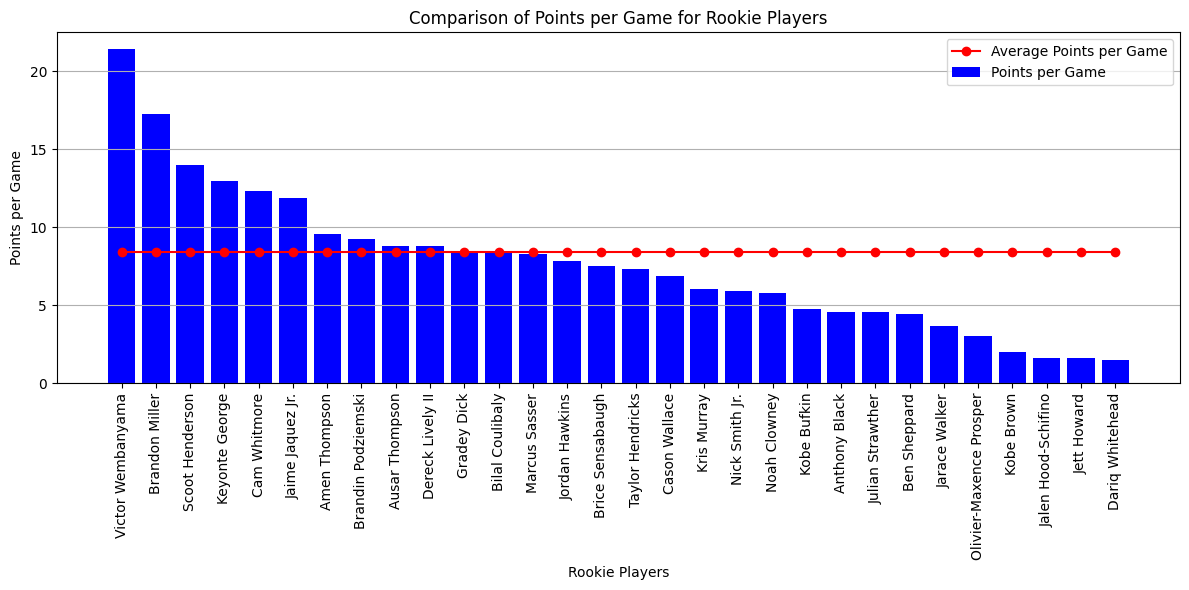

In [ ]:
# Sort the DataFrame by points per game in descending order
rookies_df_sorted = rookies_df.sort_values(by='Points per Game', ascending=False)

# Extract relevant columns from the sorted DataFrame
players = rookies_df_sorted['Player']
points_per_game = rookies_df_sorted['Points per Game']
average_points_per_game = rookies_df_sorted['Average Points per Game']

# Plotting the data
plt.figure(figsize=(12, 6))
plt.bar(players, points_per_game, label='Points per Game', color='blue')
plt.plot(players, average_points_per_game, label='Average Points per Game', color='red', marker='o')

# Adding labels and title
plt.xlabel('Rookie Players')
plt.ylabel('Points per Game')
plt.title('Comparison of Points per Game for Rookie Players')
plt.xticks(rotation=90)
plt.legend()
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

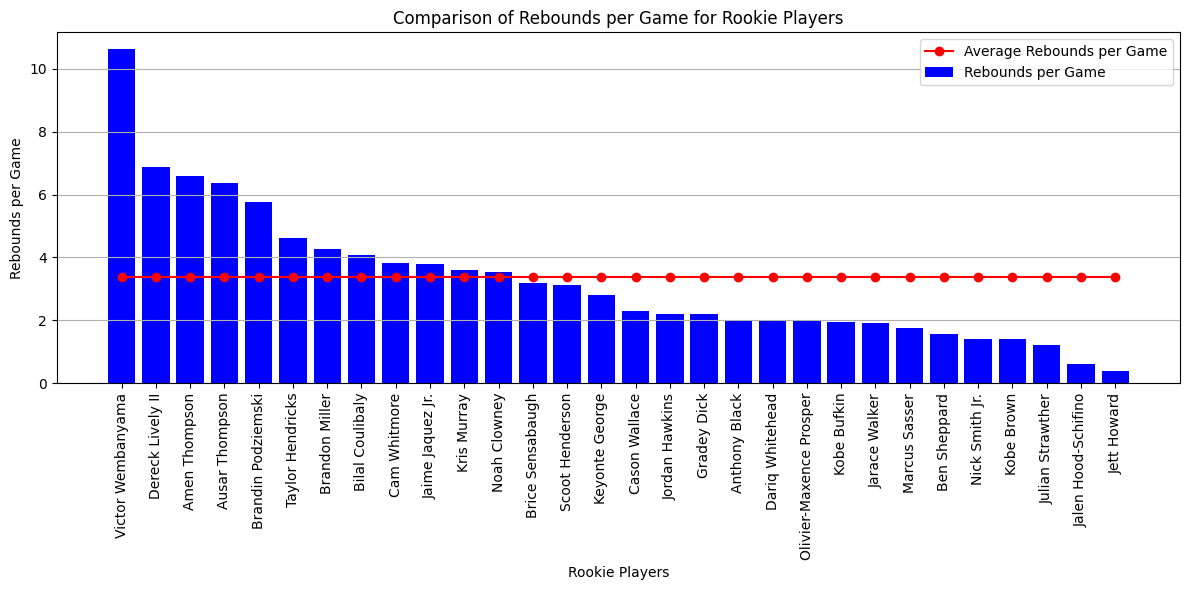

In [ ]:
# Sort the DataFrame by rebounds per game in descending order
rookies_df_sorted = rookies_df.sort_values(by='Rebounds per Game', ascending=False)

# Extract relevant columns from the sorted DataFrame
players = rookies_df_sorted['Player']
rebounds_per_game = rookies_df_sorted['Rebounds per Game']
average_rebounds_per_game = rookies_df_sorted['Average Rebounds per Game']

# Plotting the data
plt.figure(figsize=(12, 6))
plt.bar(players, rebounds_per_game, label='Rebounds per Game', color='blue')
plt.plot(players, average_rebounds_per_game, label='Average Rebounds per Game', color='red', marker='o')

# Adding labels and title
plt.xlabel('Rookie Players')
plt.ylabel('Rebounds per Game')
plt.title('Comparison of Rebounds per Game for Rookie Players')
plt.xticks(rotation=90)
plt.legend()
plt.grid(axis='y')
# Show the plot
plt.tight_layout()
plt.show()


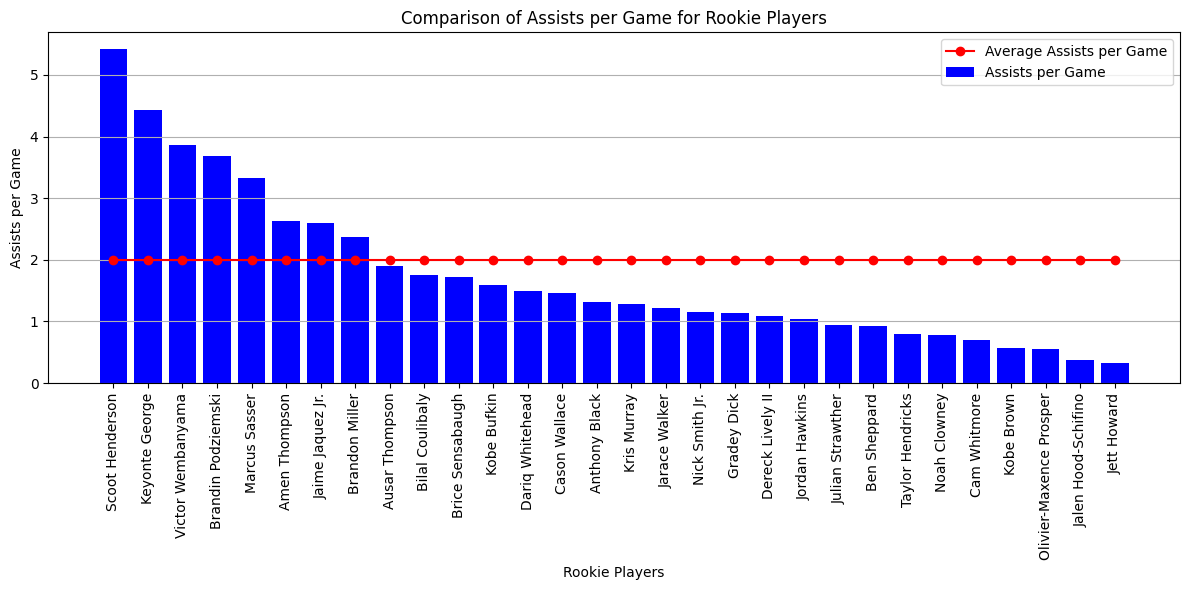

In [ ]:
# Sort the DataFrame by rebounds per game in descending order
rookies_df_sorted = rookies_df.sort_values(by='Assists per Game', ascending=False)

# Extract relevant columns from the sorted DataFrame
players = rookies_df_sorted['Player']
rebounds_per_game = rookies_df_sorted['Assists per Game']
average_rebounds_per_game = rookies_df_sorted['Average Assists per Game']

# Plotting the data
plt.figure(figsize=(12, 6))
plt.bar(players, rebounds_per_game, label='Assists per Game', color='blue')
plt.plot(players, average_rebounds_per_game, label='Average Assists per Game', color='red', marker='o')

# Adding labels and title
plt.xlabel('Rookie Players')
plt.ylabel('Assists per Game')
plt.title('Comparison of Assists per Game for Rookie Players')
plt.xticks(rotation=90)
plt.legend()
plt.grid(axis='y')
# Show the plot
plt.tight_layout()
plt.show()


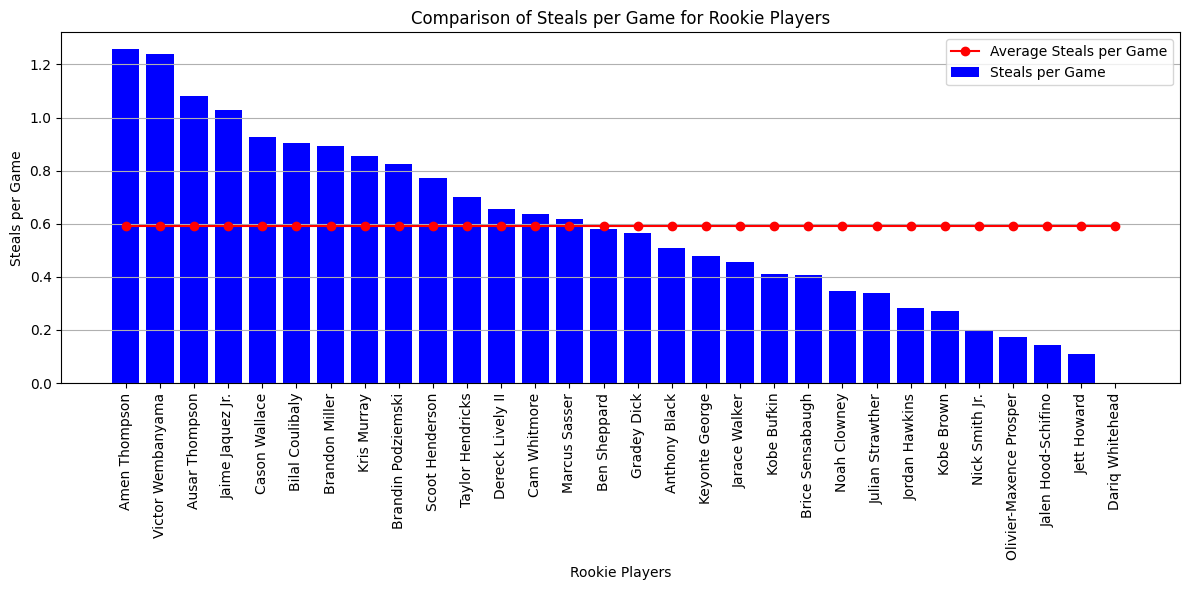

In [ ]:
# Sort the DataFrame by rebounds per game in descending order
rookies_df_sorted = rookies_df.sort_values(by='Steals per Game', ascending=False)

# Extract relevant columns from the sorted DataFrame
players = rookies_df_sorted['Player']
rebounds_per_game = rookies_df_sorted['Steals per Game']
average_rebounds_per_game = rookies_df_sorted['Average Steals per Game']

# Plotting the data
plt.figure(figsize=(12, 6))
plt.bar(players, rebounds_per_game, label='Steals per Game', color='blue')
plt.plot(players, average_rebounds_per_game, label='Average Steals per Game', color='red', marker='o')

# Adding labels and title
plt.xlabel('Rookie Players')
plt.ylabel('Steals per Game')
plt.title('Comparison of Steals per Game for Rookie Players')
plt.xticks(rotation=90)
plt.legend()
plt.grid(axis='y')
# Show the plot
plt.tight_layout()
plt.show()


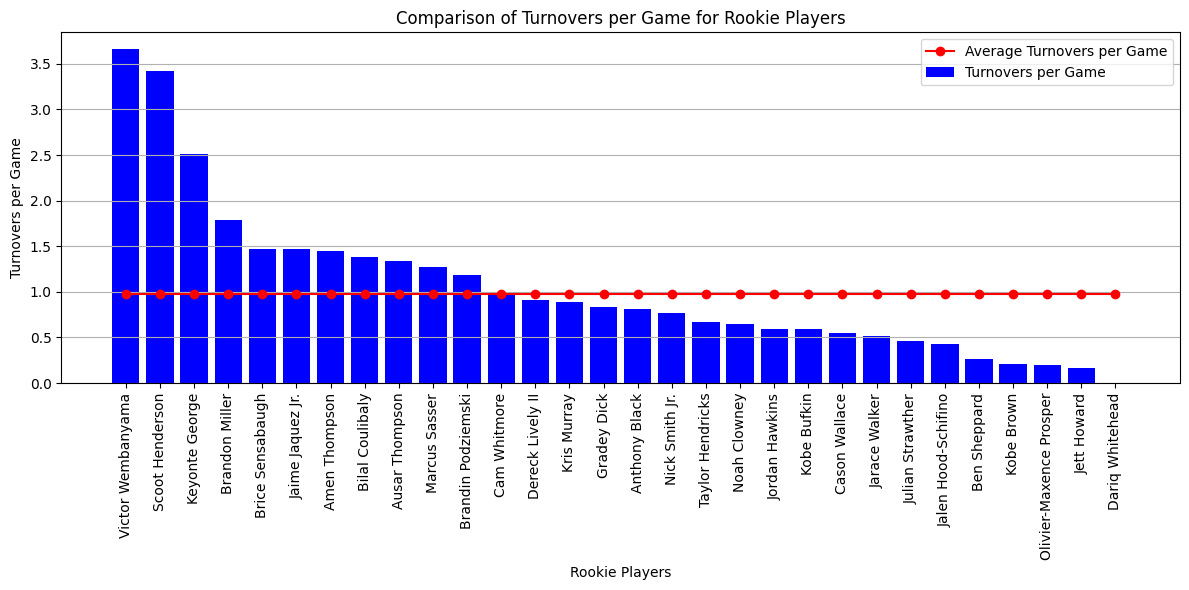

In [ ]:
# Sort the DataFrame by rebounds per game in descending order
rookies_df_sorted = rookies_df.sort_values(by='Turnovers per Game', ascending=False)

# Extract relevant columns from the sorted DataFrame
players = rookies_df_sorted['Player']
rebounds_per_game = rookies_df_sorted['Turnovers per Game']
average_rebounds_per_game = rookies_df_sorted['Average Turnovers per Game']

# Plotting the data
plt.figure(figsize=(12, 6))
plt.bar(players, rebounds_per_game, label='Turnovers per Game', color='blue')
plt.plot(players, average_rebounds_per_game, label='Average Turnovers per Game', color='red', marker='o')

# Adding labels and title
plt.xlabel('Rookie Players')
plt.ylabel('Turnovers per Game')
plt.title('Comparison of Turnovers per Game for Rookie Players')
plt.xticks(rotation=90)
plt.legend()
plt.grid(axis='y')


# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Create a new column 'Above Average' which is 1 if the player's points per game is greater than the league average, and 0 otherwise
rookies_df_sorted['Above Average'] = (rookies_df_sorted['Points per Game'] - rookies_df_sorted['Points per Game'].mean()).astype(int) + (rookies_df_sorted['Rebounds per Game'] - rookies_df_sorted['Rebounds per Game'].mean()).astype(int) + (rookies_df_sorted['Assists per Game'] - rookies_df_sorted['Assists per Game'].mean()).astype(int) - (rookies_df_sorted['Turnovers per Game'] -rookies_df_sorted['Turnovers per Game'].mean()).astype(int) + (rookies_df_sorted['Steals per Game'] - rookies_df_sorted['Steals per Game'].mean()).astype(int)
# Print the new DataFrame
rookies_df_sorted.head()



,Player,G,Points per Game,Rebounds per Game,Assists per Game,Steals per Game,Turnovers per Game,Average Points per Game,Average Rebounds per Game,Average Assists per Game,Average Steals per Game,Average Turnovers per Game,Above Average
556,Victor Wembanyama,71.0,21.436620,10.633803,3.859155,1.239437,3.661972,8.4223,3.374702,2.001295,0.59035,0.981566,20
496,Scoot Henderson,62.0,14.000000,3.129032,5.419355,0.774194,3.419355,8.4223,3.374702,2.001295,0.59035,0.981566,7
345,Keyonte George,75.0,12.986667,2.813333,4.426667,0.480000,2.506667,8.4223,3.374702,2.001295,0.59035,0.981566,6
54,Brandon Miller,74.0,17.283784,4.256757,2.364865,0.891892,1.783784,8.4223,3.374702,2.001295,0.59035,0.981566,9
57,Brice Sensabaugh,32.0,7.531250,3.187500,1.718750,0.406250,1.468750,8.4223,3.374702,2.001295,0.59035,0.981566,0


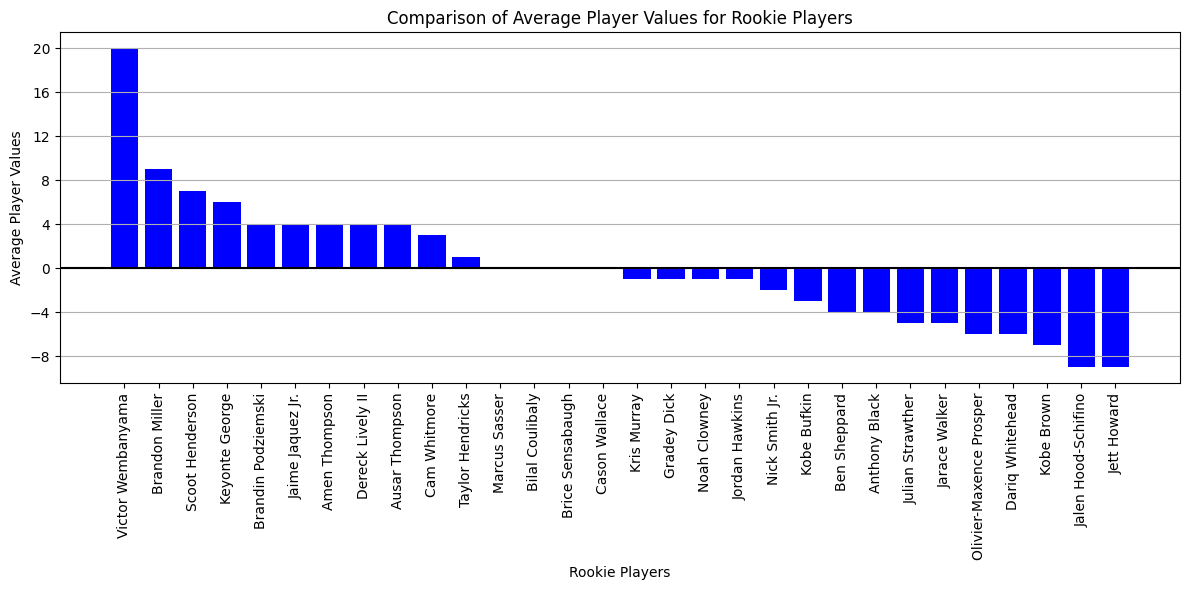

In [ ]:


# Sort the DataFrame by rebounds per game in descending order
rookies_df_sorted = rookies_df_sorted.sort_values(by='Above Average', ascending=False)

# Extract relevant columns from the sorted DataFrame
players = rookies_df_sorted['Player']
above_average = rookies_df_sorted['Above Average']

# Plotting the data
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(players, above_average, label='Above Average', color='blue')

# Add a horizontal line at y=0
ax.axhline(0, color='black')

# Set y-axis to display only whole numbers
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Adding labels and title
ax.set_xlabel('Rookie Players')
ax.set_ylabel('Average Player Values')
ax.set_title('Comparison of Average Player Values for Rookie Players')
plt.xticks(rotation=90)
ax.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()
